<a href="https://colab.research.google.com/github/SinisterXI/CS-351L---AI-Lab-GitHub-Repository_2022428/blob/main/Shameer_CS351L_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

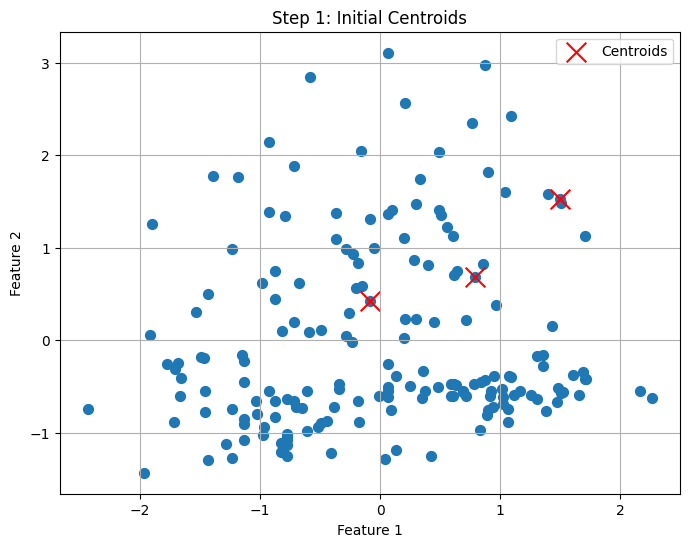

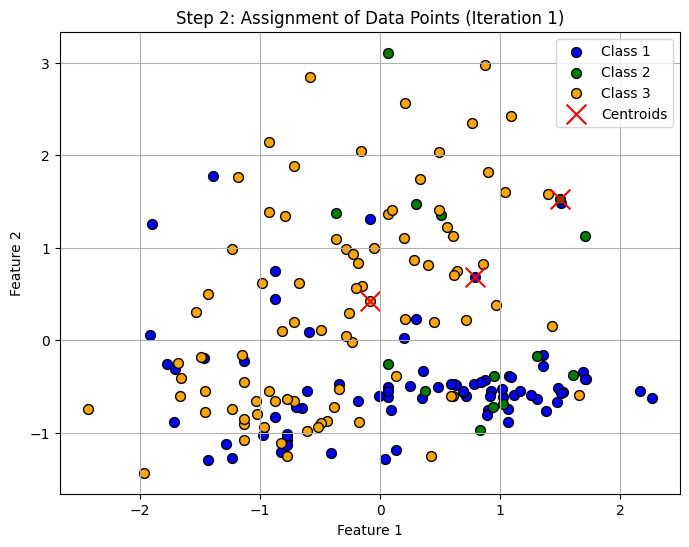

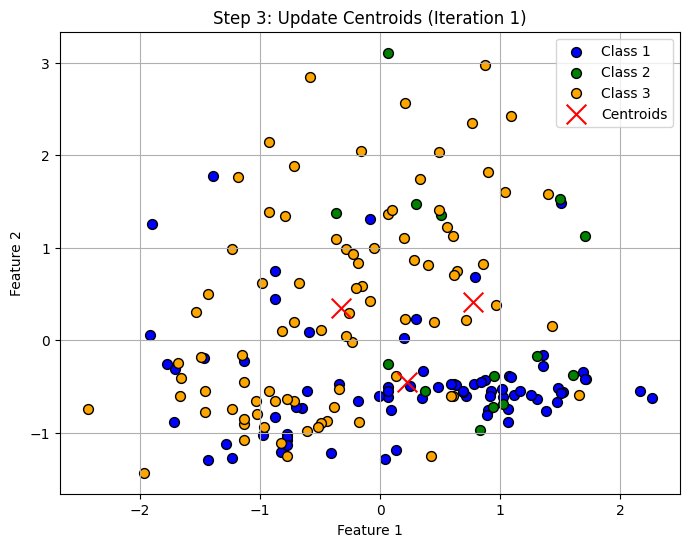

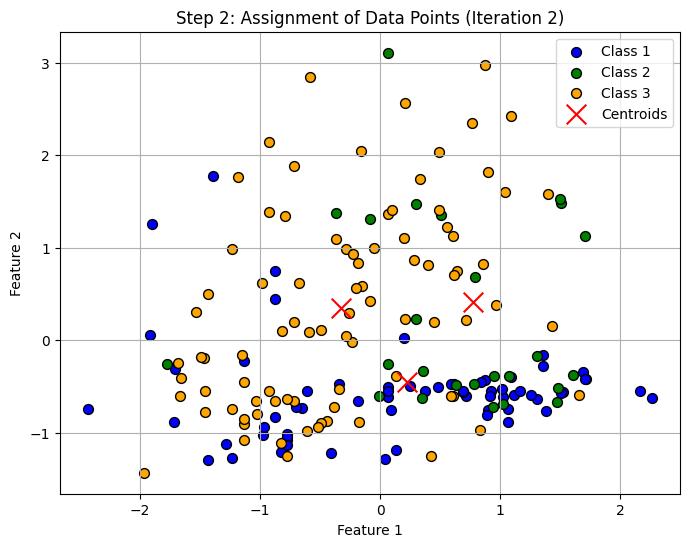

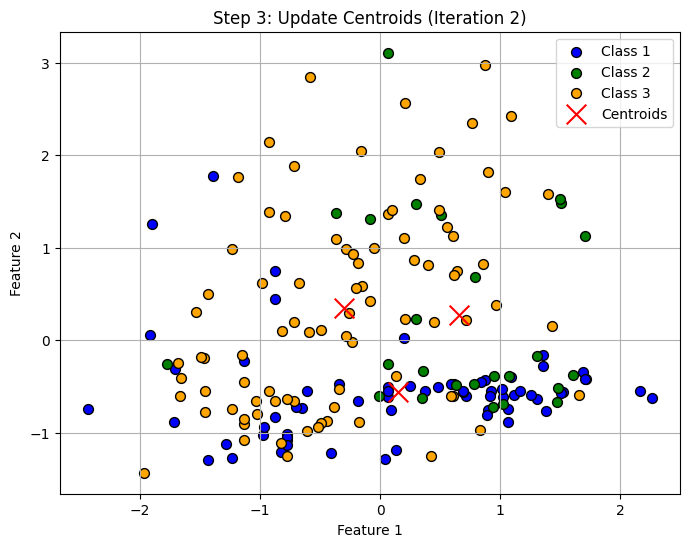

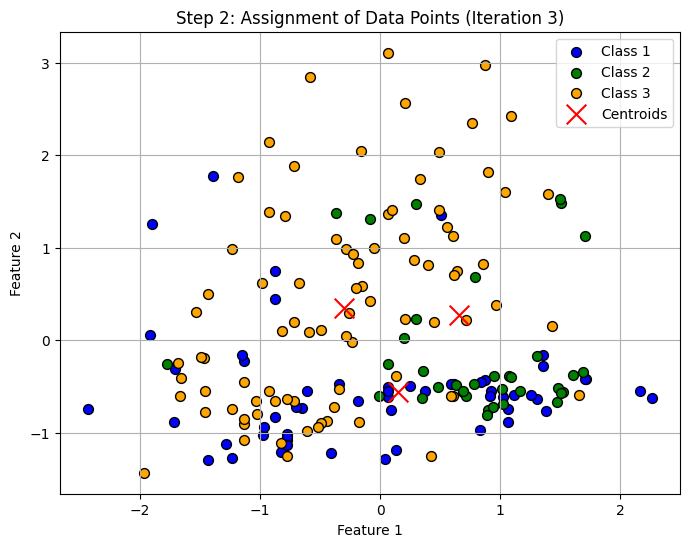

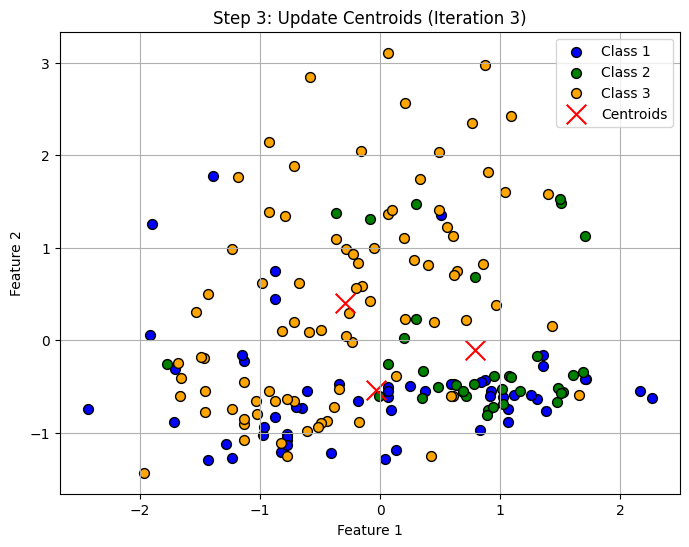

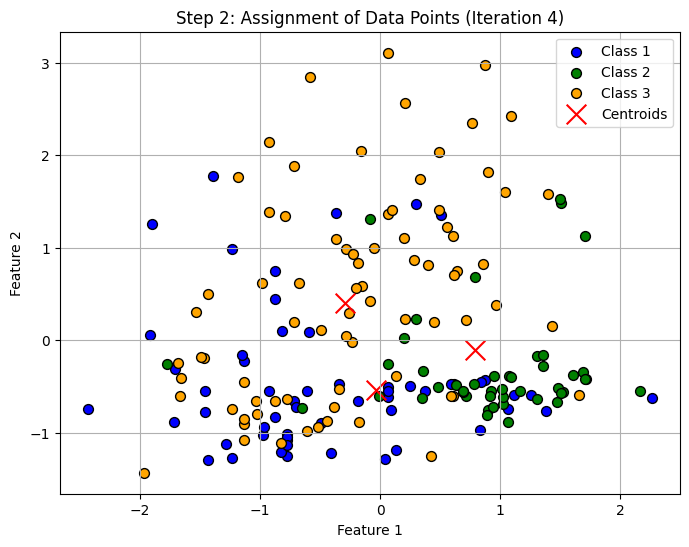

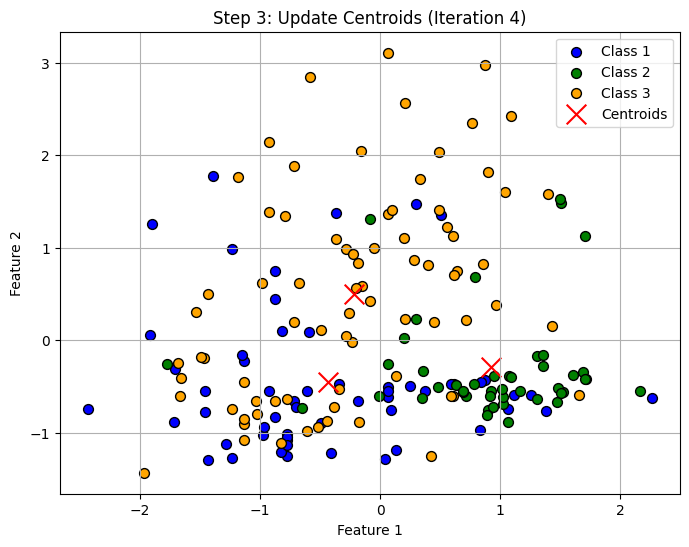

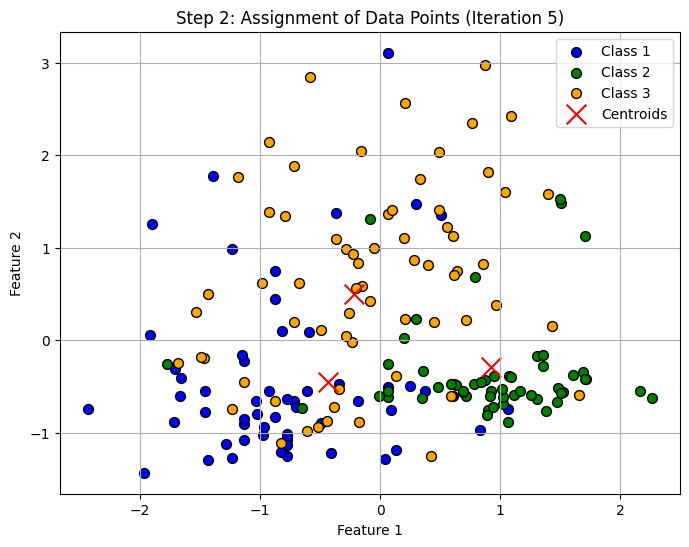

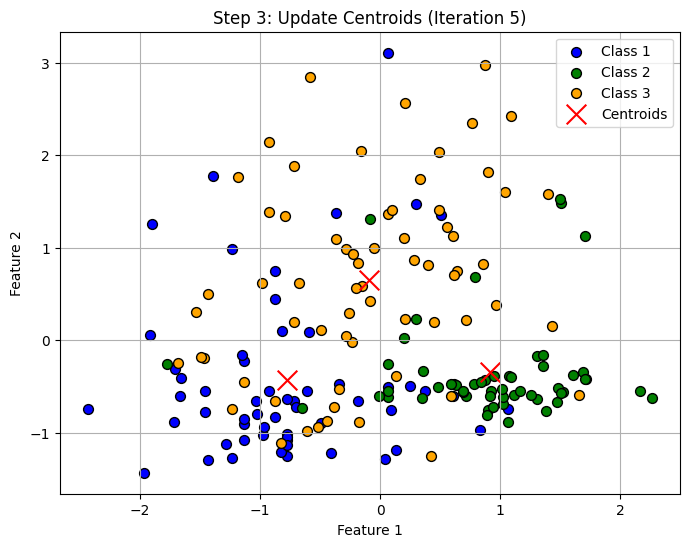

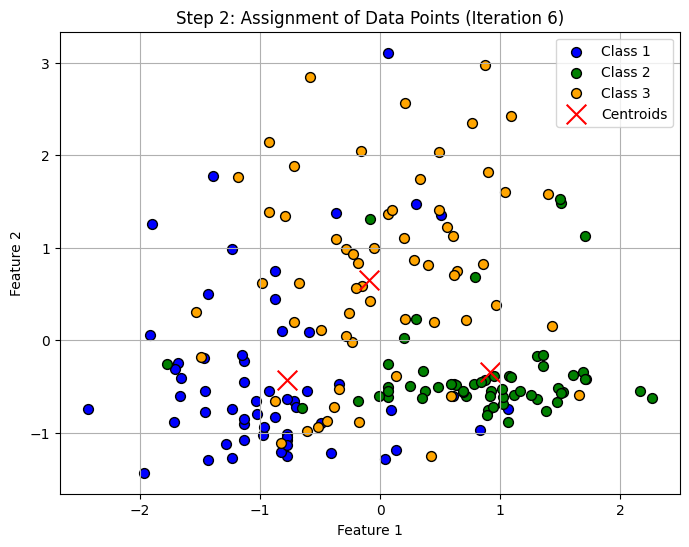

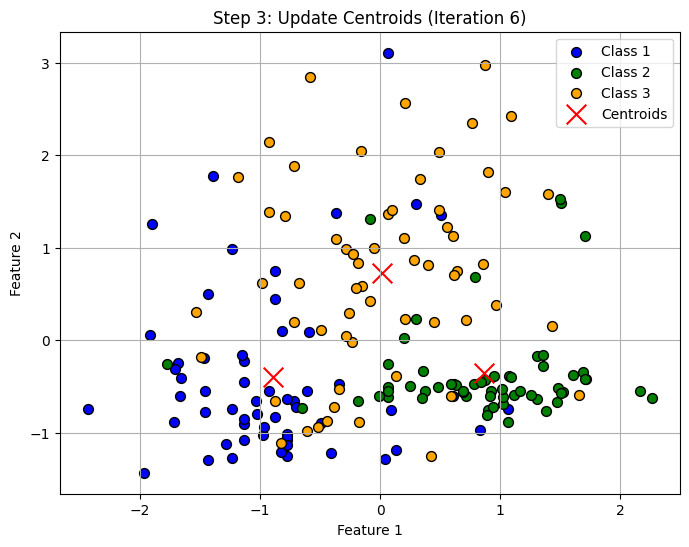

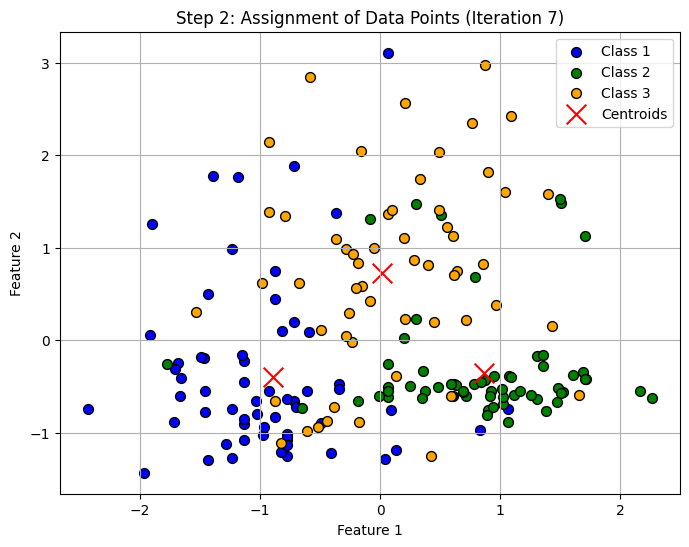

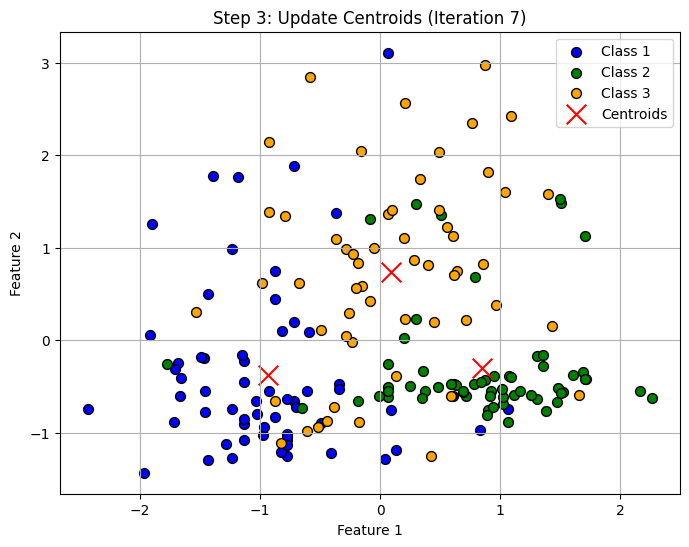

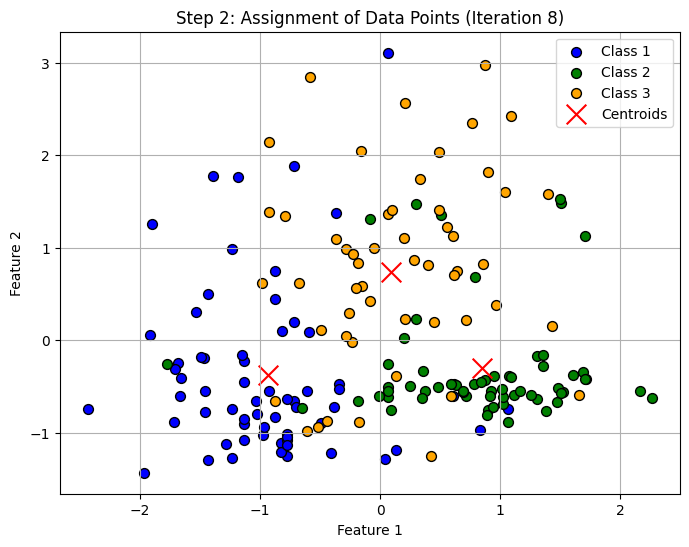

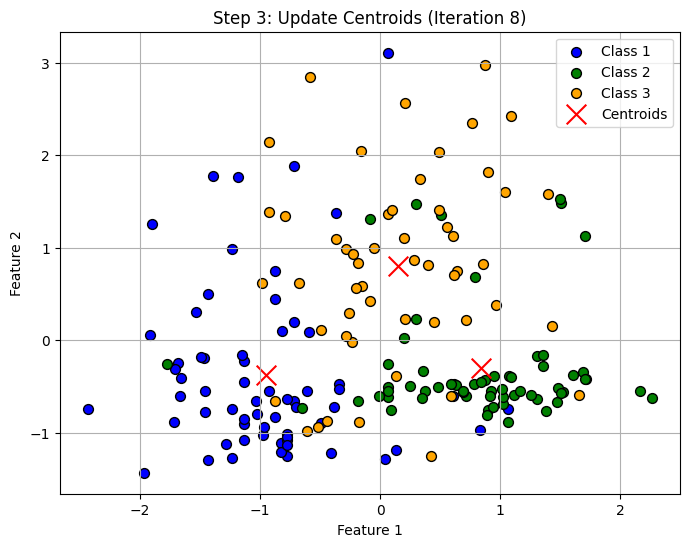

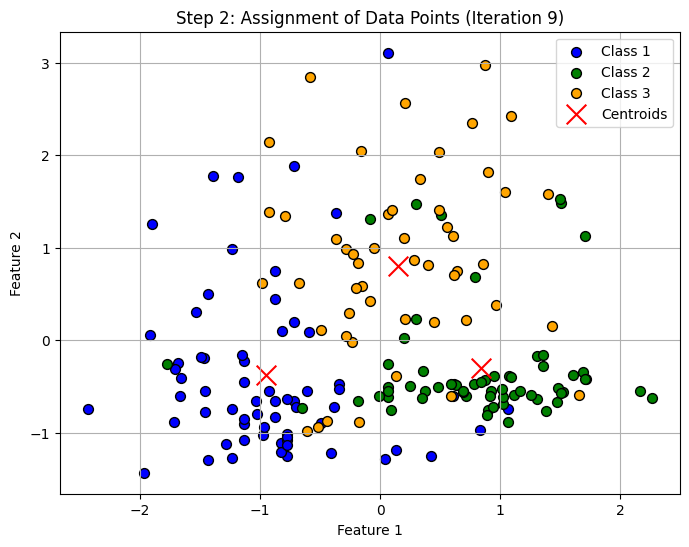

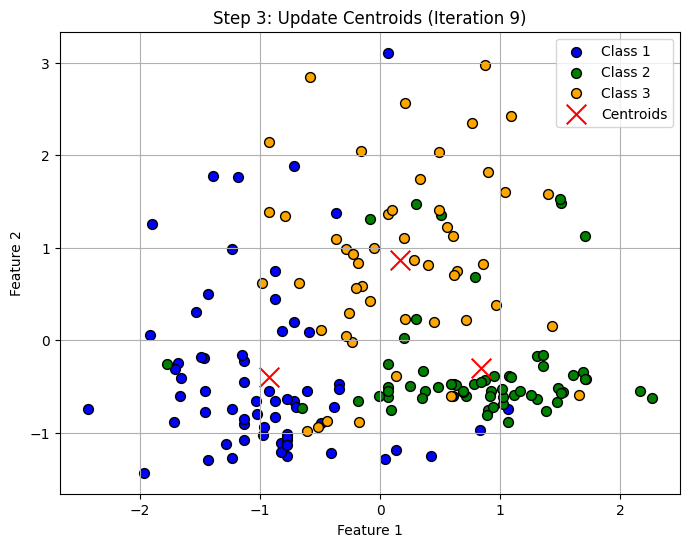

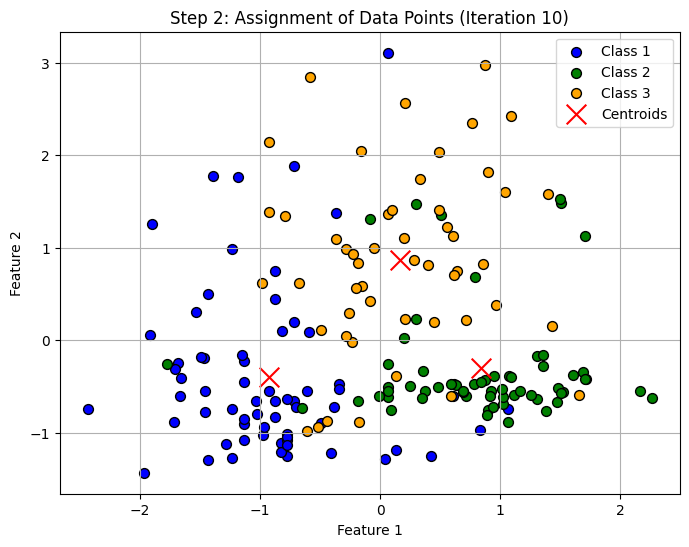

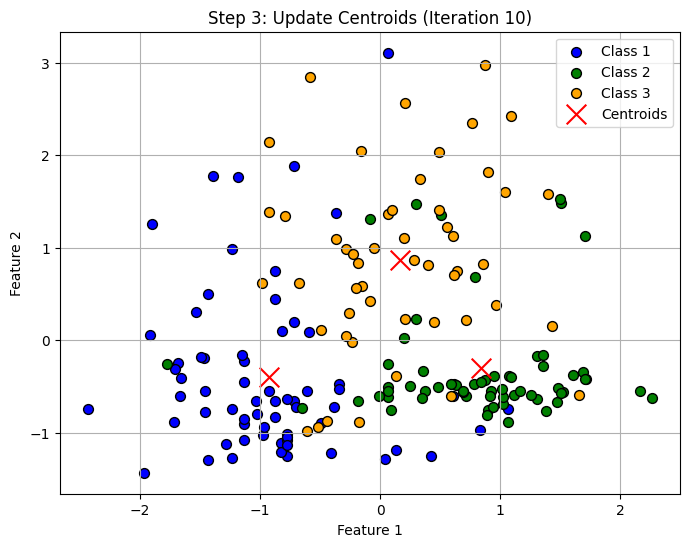

In [3]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.datasets import load_wine  # Load the Wine dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Only use the features for clustering
y = wine.target  # The target labels

# Standardize the features to ensure all features have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement k-Means Clustering with step-by-step visualizations
def kmeans(X, k, max_iterations=100):
    np.random.seed(42)  # Seed for reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Step 1: Initialize centroids
    visualize_step(X, centroids, None, title="Step 1: Initial Centroids")  # Visualize initial centroids

    for iteration in range(max_iterations):
        # Step 2: Assign each data point to the closest centroid
        labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        visualize_step(X, centroids, labels, title=f"Step 2: Assignment of Data Points (Iteration {iteration + 1})")

        # Step 3: Calculate new centroids based on mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        visualize_step(X, new_centroids, labels, title=f"Step 3: Update Centroids (Iteration {iteration + 1})")

        # If centroids do not change, break the loop (algorithm converged)
        if np.all(centroids == new_centroids):
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    return centroids, labels

# Function to visualize clustering process at each step
def visualize_step(X, centroids, labels=None, title="Clustering Step"):
    plt.figure(figsize=(8, 6))

    # Create a dictionary for class names and their corresponding colors
    class_names = {0: 'Class 1', 1: 'Class 2', 2: 'Class 3'}
    colors = ['blue', 'green', 'orange']

    # Plot data points with labels if they exist
    if labels is not None:
        for class_label in np.unique(labels):
            plt.scatter(X[labels == class_label, 0], X[labels == class_label, 1],
                        label=class_names[class_label], s=50, edgecolor='k', color=colors[class_label % len(colors)])
    else:
        plt.scatter(X[:, 0], X[:, 1], s=50)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the number of clusters (k)
k = 3  # We are setting 3 clusters since the Wine dataset has 3 categories

# Run the k-Means algorithm with visualizations for each step
centroids, labels = kmeans(X_scaled, k)
